In [1]:
# https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

import torch
z= torch.zeros(5, 3)
z= torch.ones( 5, 3)
z= torch.rand( 5, 3) # uniform distribution
z= torch.randn(5, 3) # normal distribution
z= torch.empty(5, 3)
z= torch.arange(0, 15).view(5,3)
z

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

![](https://pytorch.org/tutorials/_images/mnist.png)

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 
        # 6 output channels, 
        # 5x5 square convolution kernel
        self.conv1= nn.Conv2d(1,  6, 5)
        self.conv2= nn.Conv2d(6, 16, 5)

        # an affine operation: y = x@W + b
        self.fc1= nn.Linear(16*5*5, 120)  # 5*5 from image dimension
        self.fc2= nn.Linear(120, 84)
        self.fc3= nn.Linear( 84, 10)

    def forward(self, x):
    
        x= F.relu(self.conv1(x))
        x= F.max_pool2d(x, (2, 2)) 
        x= F.relu(self.conv2(x))
        x= F.max_pool2d(x, (2, 2))

        # flatten the tensor
        x= x.view(-1, self.num_flat_features(x))
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)

        x= F.softmax(x, dim=1)
        
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net=  LeNet()
x=    torch.rand(1, 1, 32, 32)   
y=    net(x)

net, x, y


(LeNet(
   (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
   (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (fc1): Linear(in_features=400, out_features=120, bias=True)
   (fc2): Linear(in_features=120, out_features=84, bias=True)
   (fc3): Linear(in_features=84, out_features=10, bias=True)
 ),
 tensor([[[[0.6447, 0.2960, 0.9674,  ..., 0.4360, 0.2108, 0.4282],
           [0.8611, 0.7393, 0.6645,  ..., 0.0019, 0.5026, 0.7507],
           [0.0575, 0.6225, 0.0682,  ..., 0.5457, 0.2363, 0.2581],
           ...,
           [0.6982, 0.6175, 0.7006,  ..., 0.2015, 0.7270, 0.8013],
           [0.0337, 0.8676, 0.1936,  ..., 0.7753, 0.8279, 0.3927],
           [0.8123, 0.7718, 0.7691,  ..., 0.0618, 0.5524, 0.2088]]]]),
 tensor([[0.0973, 0.0929, 0.1174, 0.1068, 0.0930, 0.1039, 0.0943, 0.1138, 0.0925,
          0.0881]], grad_fn=<SoftmaxBackward0>))

In [3]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset= torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform= transform
    )

trainloader= torch.utils.data.DataLoader(
    trainset, 
    batch_size= 4,
    shuffle= True, 
    num_workers= 2 # 0 for Windows ???
    )


Files already downloaded and verified


plane  ship  frog   cat


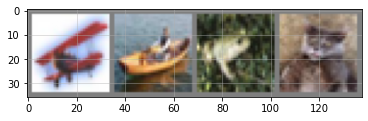

In [4]:
import matplotlib.pyplot as plt
import numpy as np

classes= (
    'plane', 
    'car', 
    'bird', 
    'cat',
    'deer', 
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter= iter(trainloader)
images, labels= next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


Files already downloaded and verified
Files already downloaded and verified
  cat   car truck  bird
[1,  2000] loss: 2.227
[1,  4000] loss: 1.845
[1,  6000] loss: 1.708
[1,  8000] loss: 1.586
[1, 10000] loss: 1.520
[1, 12000] loss: 1.482
Finished Training
Accuracy of the network on the 10000 test images: 46 %


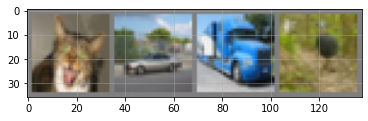

In [5]:
# Training Your PyTorch Model
# Let’s put all the pieces together, and train a model:

#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))



In [6]:
# Let's put the model on the GPU:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)



cuda:0


In [8]:
batch_size= 16

trainset= torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=transform)

trainloader= torch.utils.data.DataLoader(
    trainset, 
    batch_size= batch_size,
    shuffle=True)

testset= torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=transform)

testloader= torch.utils.data.DataLoader(
    testset, 
    batch_size= batch_size,
    shuffle=False)


# The rest of this section assumes that `device` is a CUDA device.

net= Net()
net.to(device)


# Training on GPU
# Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.
# This will recursively go over all modules and convert their parameters and buffers to CUDA tensors:




criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        #images, labels = data
        images, labels = data[0].to(device), data[1].to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# [20,  2000] loss: 0.642
# Finished Training
# Accuracy of the network on the 10000 test images: 65 %



Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.113
[2,  2000] loss: 1.555
[3,  2000] loss: 1.373
[4,  2000] loss: 1.275
[5,  2000] loss: 1.187
[6,  2000] loss: 1.116
[7,  2000] loss: 1.065
[8,  2000] loss: 1.012
[9,  2000] loss: 0.970
[10,  2000] loss: 0.928
[11,  2000] loss: 0.890
[12,  2000] loss: 0.855
[13,  2000] loss: 0.823
[14,  2000] loss: 0.793
[15,  2000] loss: 0.767
[16,  2000] loss: 0.739
[17,  2000] loss: 0.711
[18,  2000] loss: 0.681
[19,  2000] loss: 0.665
[20,  2000] loss: 0.642
Finished Training
Accuracy of the network on the 10000 test images: 65 %
